# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


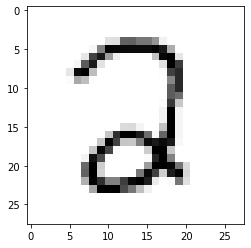

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2409
Training Accuracy: 0.5940, Testing Accuracy: 0.5796



Epoch 10, Loss 0.1016
Training Accuracy: 0.8986, Testing Accuracy: 0.9042



Epoch 20, Loss 0.0614
Training Accuracy: 0.9326, Testing Accuracy: 0.9435



Epoch 30, Loss 0.0471
Training Accuracy: 0.9476, Testing Accuracy: 0.9567



Epoch 40, Loss 0.04
Training Accuracy: 0.9552, Testing Accuracy: 0.9647



Epoch 50, Loss 0.0358
Training Accuracy: 0.9593, Testing Accuracy: 0.9662



Epoch 60, Loss 0.0329
Training Accuracy: 0.9631, Testing Accuracy: 0.9682



Epoch 70, Loss 0.0308
Training Accuracy: 0.9654, Testing Accuracy: 0.9693



Epoch 80, Loss 0.0292
Training Accuracy: 0.9666, Testing Accuracy: 0.9682



Epoch 90, Loss 0.0278
Training Accuracy: 0.9680, Testing Accuracy: 0.9688



Epoch 100, Loss 0.0267
Training Accuracy: 0.9700, Testing Accuracy: 0.9708



Epoch 110, Loss 0.0257
Training Accuracy: 0.9708, Testing Accuracy: 0.9713



Epoch 120, Loss 0.0248
Training Accuracy: 0.9721, Testing Accuracy: 0.9723



Epoch 130, Loss 0.0241
Training Accuracy: 0.9729, Testing Accuracy: 0.9723



Epoch 140, Loss 0.0234
Training Accuracy: 0.9738, Testing Accuracy: 0.9728



Epoch 150, Loss 0.0227
Training Accuracy: 0.9746, Testing Accuracy: 0.9733



Epoch 160, Loss 0.0221
Training Accuracy: 0.9752, Testing Accuracy: 0.9738



Epoch 170, Loss 0.0216
Training Accuracy: 0.9756, Testing Accuracy: 0.9748



Epoch 180, Loss 0.0211
Training Accuracy: 0.9764, Testing Accuracy: 0.9753



Epoch 190, Loss 0.0206
Training Accuracy: 0.9771, Testing Accuracy: 0.9758



Epoch 200, Loss 0.0201
Training Accuracy: 0.9775, Testing Accuracy: 0.9763



Epoch 210, Loss 0.0197
Training Accuracy: 0.9779, Testing Accuracy: 0.9758



Epoch 220, Loss 0.0193
Training Accuracy: 0.9783, Testing Accuracy: 0.9758



Epoch 230, Loss 0.0189
Training Accuracy: 0.9788, Testing Accuracy: 0.9763



Epoch 240, Loss 0.0185
Training Accuracy: 0.9795, Testing Accuracy: 0.9773



Epoch 250, Loss 0.0182
Training Accuracy: 0.9799, Testing Accuracy: 0.9773



0.002303646969705582

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2367
Training Accuracy: 0.7039, Testing Accuracy: 0.7208



Epoch 10, Loss 0.1055
Training Accuracy: 0.8978, Testing Accuracy: 0.9108



Epoch 20, Loss 0.0811
Training Accuracy: 0.9239, Testing Accuracy: 0.9304



Epoch 30, Loss 0.0697
Training Accuracy: 0.9338, Testing Accuracy: 0.9446



Epoch 40, Loss 0.0627
Training Accuracy: 0.9382, Testing Accuracy: 0.9511



Epoch 50, Loss 0.058
Training Accuracy: 0.9413, Testing Accuracy: 0.9531



Epoch 60, Loss 0.0546
Training Accuracy: 0.9453, Testing Accuracy: 0.9572



Epoch 70, Loss 0.0519
Training Accuracy: 0.9473, Testing Accuracy: 0.9597



Epoch 80, Loss 0.0498
Training Accuracy: 0.9493, Testing Accuracy: 0.9597



Epoch 90, Loss 0.0481
Training Accuracy: 0.9505, Testing Accuracy: 0.9607



Epoch 100, Loss 0.0466
Training Accuracy: 0.9520, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0454
Training Accuracy: 0.9528, Testing Accuracy: 0.9642



Epoch 120, Loss 0.0443
Training Accuracy: 0.9533, Testing Accuracy: 0.9647



Epoch 130, Loss 0.0433
Training Accuracy: 0.9542, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0425
Training Accuracy: 0.9548, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0417
Training Accuracy: 0.9552, Testing Accuracy: 0.9662



Epoch 160, Loss 0.041
Training Accuracy: 0.9564, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0404
Training Accuracy: 0.9567, Testing Accuracy: 0.9667



Epoch 180, Loss 0.0398
Training Accuracy: 0.9570, Testing Accuracy: 0.9667



Epoch 190, Loss 0.0393
Training Accuracy: 0.9575, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0388
Training Accuracy: 0.9579, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0384
Training Accuracy: 0.9582, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0379
Training Accuracy: 0.9583, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0375
Training Accuracy: 0.9589, Testing Accuracy: 0.9677



Epoch 240, Loss 0.0372
Training Accuracy: 0.9594, Testing Accuracy: 0.9677



Epoch 250, Loss 0.0368
Training Accuracy: 0.9597, Testing Accuracy: 0.9672



0.017527618452034065

### Comparing results of NN and LR

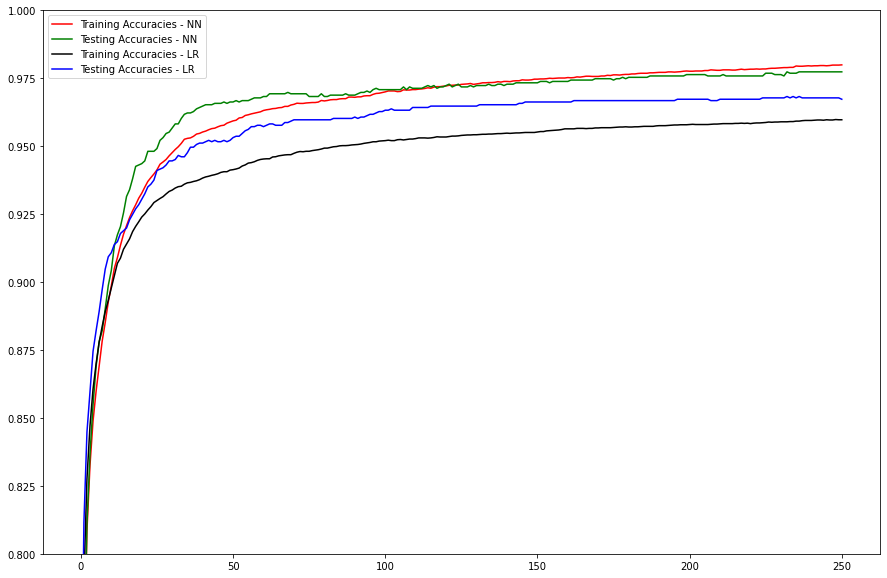

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

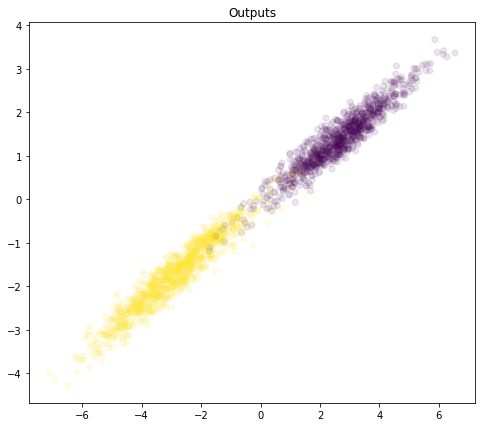

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

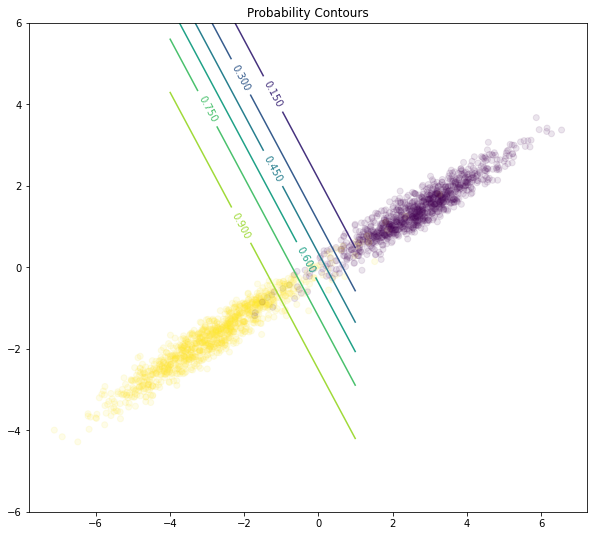

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );